In [2]:
import pandas as pd
import missingno as msno
import seaborn as sns

In [3]:
df=pd.read_csv("tech_salary_data.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62519 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61772 non-null  object 
 9   basesalary               62642 non-null  int64  
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40134 non-null  object 
 14  cityid                

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,...,7392,807.0,1,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,...,7419,807.0,2,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,...,11527,819.0,3,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,...,7472,807.0,7,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,...,7322,807.0,9,0,0,0,0,0,NaN,NaN


In [4]:
df.isnull().sum()

timestamp                      0
company                        5
level                        123
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          870
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22508
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race                       40215
Education                  32272
dtype: int64

In [5]:
print(df['location'].unique())

['Redwood City, CA' 'San Francisco, CA' 'Seattle, WA' ...
 'Pasir Ris, SG, Singapore' 'Richmond, VA, United States' 'Hilbert, WI']


In [6]:
df.count()
df.sample(10)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race,Education
14678,1/7/2020 1:13:53,Google,L5,Hardware Engineer,333000,"Mountain View, CA",16.0,2.0,Camera,195000,...,7322,807.0,19806,1,0,0,0,0,NaN,Master's Degree
60582,8/6/2021 23:02:59,Juniper Networks,Sr Staff,Software Engineer,50000,"Bangalore, KA, India",15.0,9.0,Other,50000,...,4058,0.0,82090,0,1,0,0,0,Asian,Bachelor's Degree
19960,4/23/2020 17:26:14,Google,L3,Software Engineer,193000,"Sunnyvale, CA",1.0,1.0,API Development (Back-End),133000,...,7472,807.0,27196,1,0,0,0,0,NaN,Master's Degree
51069,5/11/2021 1:33:55,Microsoft,62,Software Engineer,243000,"Zurich, ZH, Switzerland",8.0,0.0,API Development (Back-End),200000,...,6736,0.0,69321,1,0,0,0,0,White,Master's Degree
26238,8/11/2020 11:34:31,Expedia,SDE I,Software Engineer,143000,"Seattle, WA",2.0,1.0,Web Development (Front-End),125000,...,11527,819.0,36079,1,0,0,0,0,White,Master's Degree
22872,6/21/2020 0:59:42,Cornerstone Ondemand,Software Engineer,Software Engineer,152000,"Santa Monica, CA",1.0,1.0,Distributed Systems (Back-End),123000,...,7438,803.0,31242,1,0,0,0,0,NaN,Master's Degree
1291,9/16/2018 21:49:10,Amazon,Senior Product Manager,Product Manager,210000,"Seattle, WA",10.0,1.0,Product,149000,...,11527,819.0,2102,0,0,0,0,0,NaN,NaN
18181,3/10/2020 21:42:51,Nvidia,IC4,Hardware Engineer,192000,"Santa Clara, CA",8.0,8.0,GPU design,177000,...,7434,807.0,24766,1,0,0,0,0,NaN,Master's Degree
58885,7/24/2021 16:00:09,Capital One,Principal Associate,Software Engineer,151000,"Plano, TX",5.0,2.0,Full Stack,141000,...,11204,623.0,79763,0,1,0,0,0,White,Bachelor's Degree
23383,7/1/2020 20:36:21,Lyft,T5,Product Designer,395000,"San Francisco, CA",5.0,5.0,Full Stack,200000,...,7419,807.0,32019,0,0,0,0,0,NaN,NaN


<Axes: >

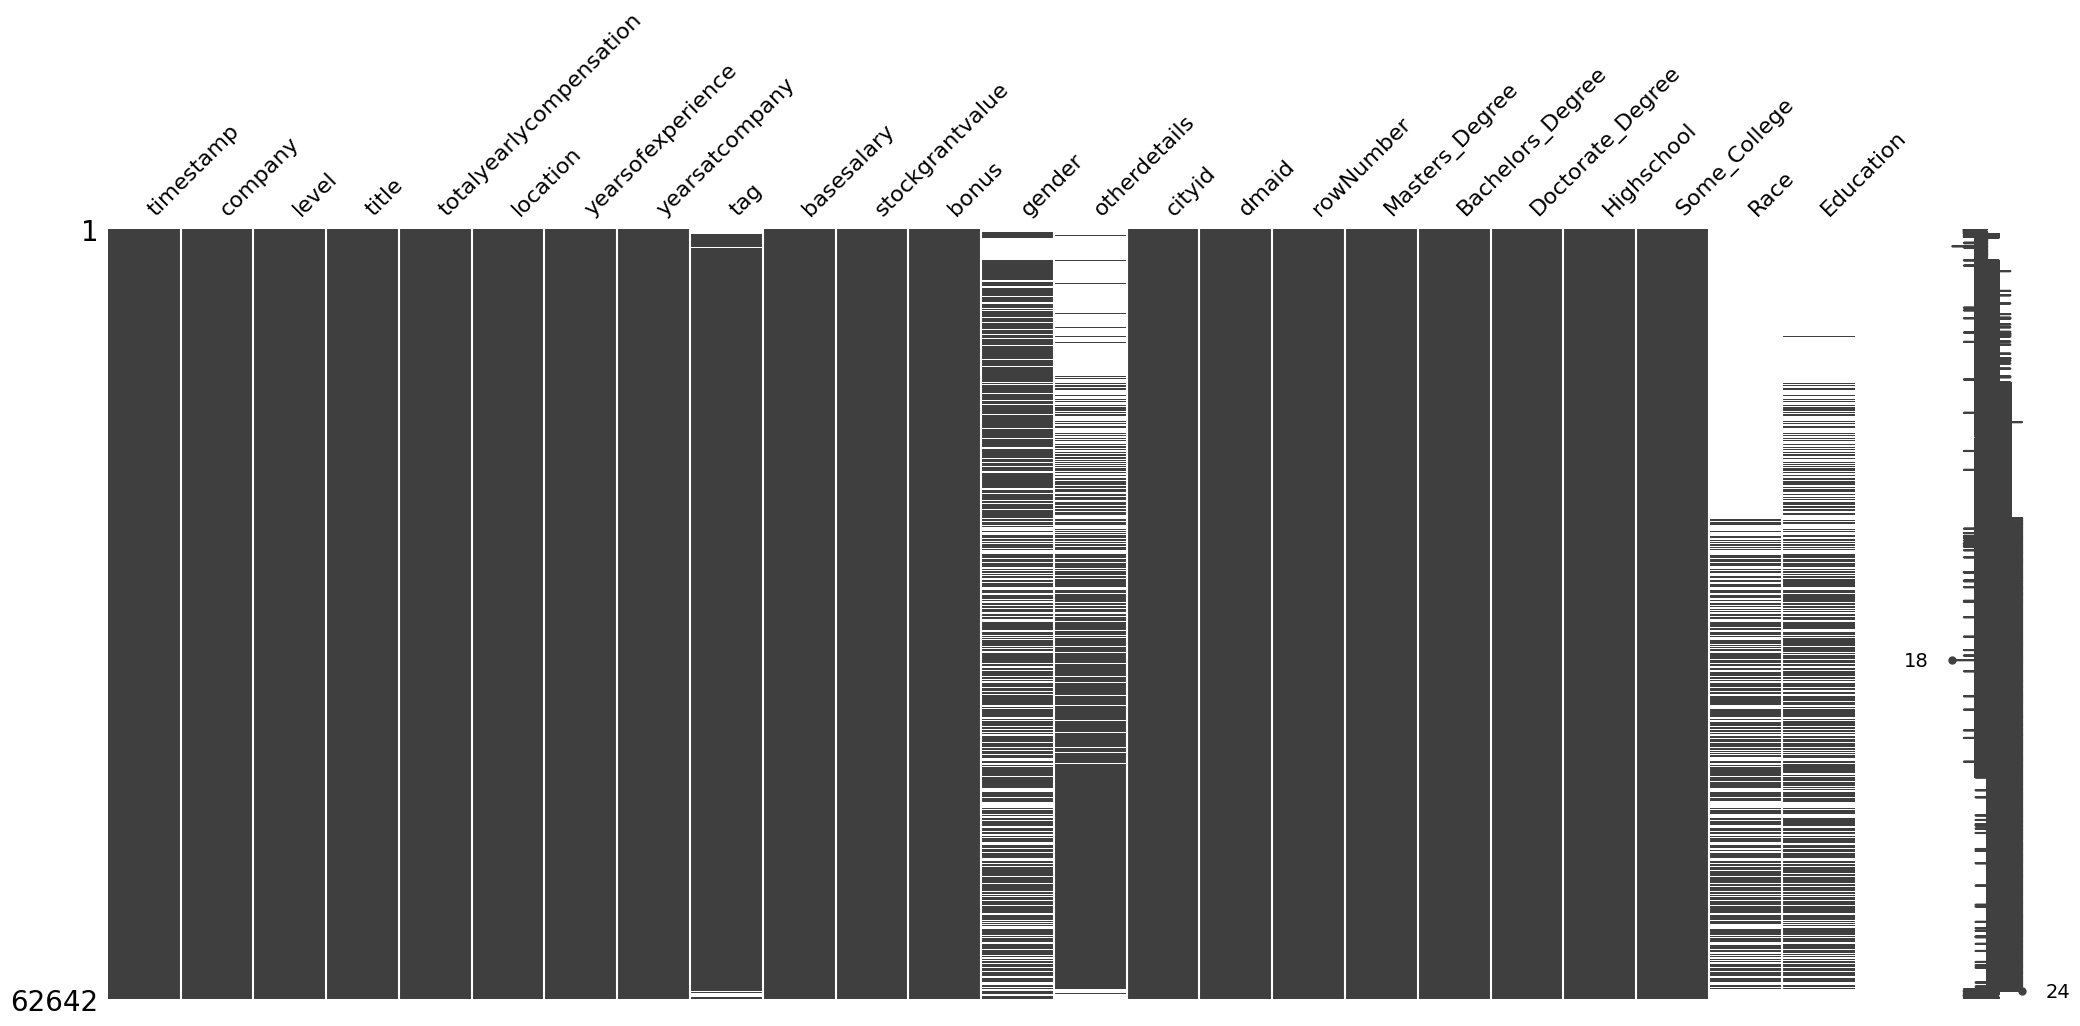

In [7]:

msno.matrix(df)

<Axes: >

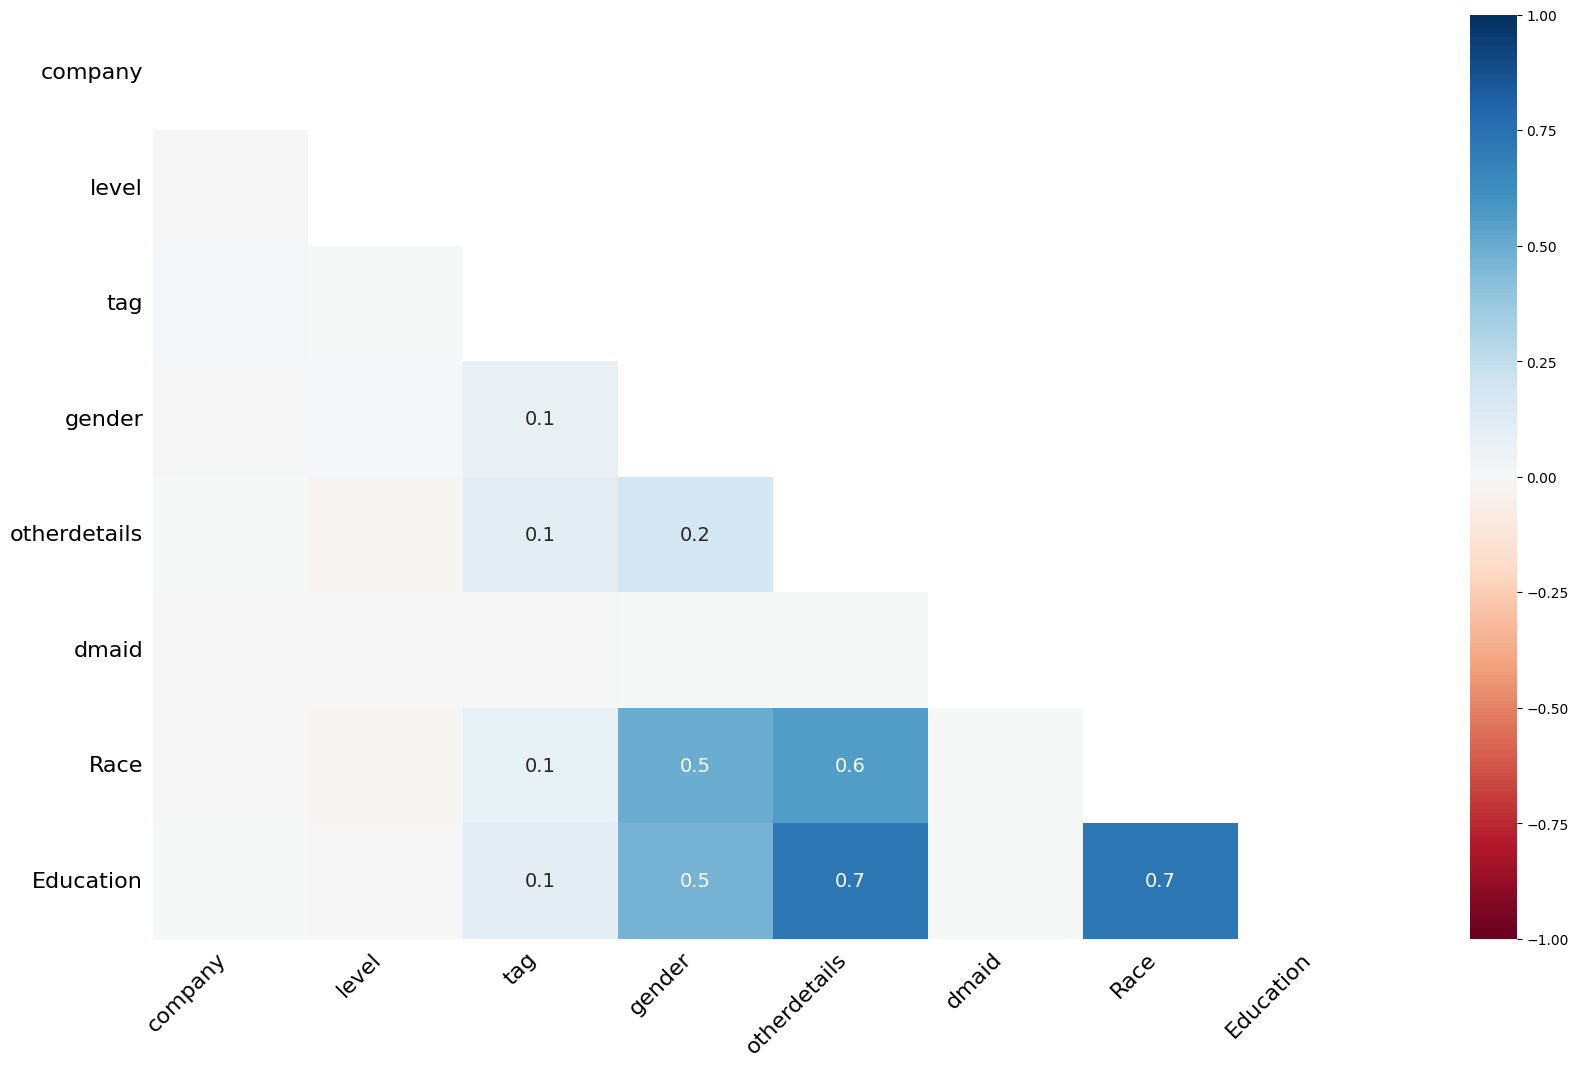

In [8]:
msno.heatmap(df)